In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [5]:
table = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [6]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
table.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [16]:
pd.isnull(table).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

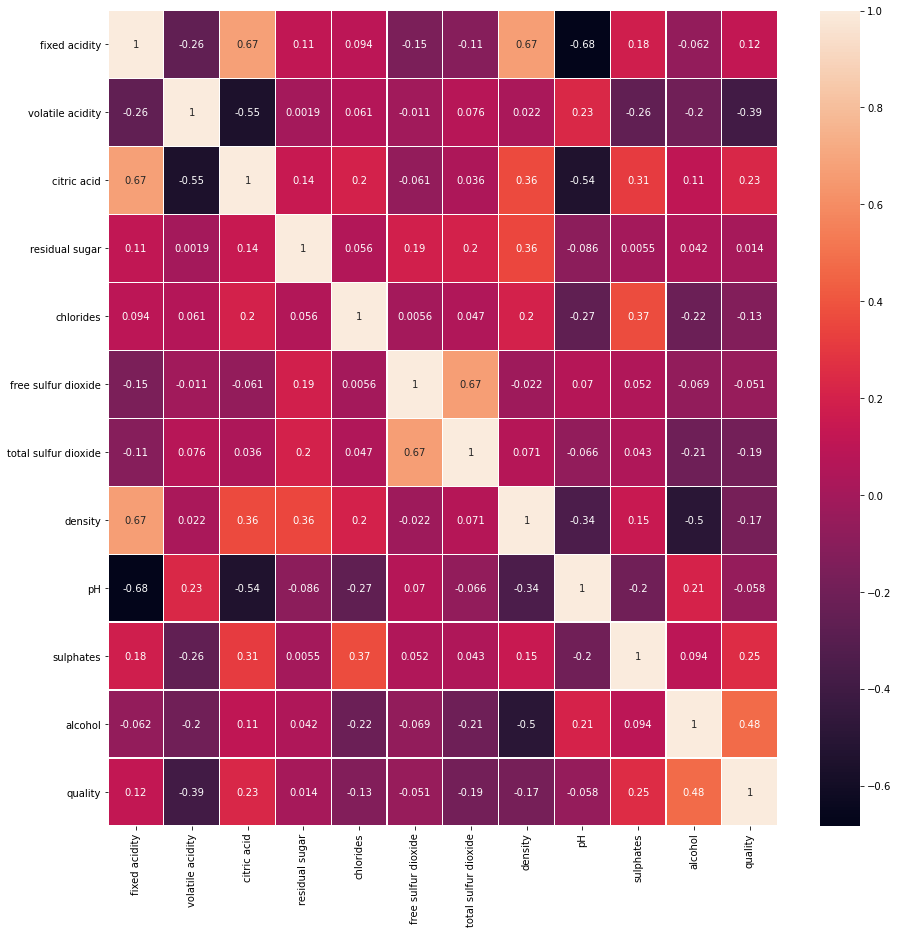

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(table.corr(),annot=True, linewidths=0.2)
plt.show()

Text(0.5, 0.98, 'Relation of Quality with Alcohol and Sulphates')

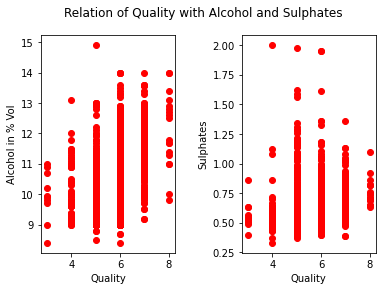

In [57]:
fig, ax = plt.subplots(1,2)
ax[0].scatter(table.quality, table.alcohol, facecolor = 'red')
ax[0].set_xlabel('Quality')
ax[0].set_ylabel('Alcohol in % Vol')

ax[1].scatter(table.quality, table.sulphates, facecolor = 'red')
ax[1].set_xlabel('Quality')
ax[1].set_ylabel('Sulphates')

fig.subplots_adjust(wspace=0.5)
fig.suptitle('Relation of Quality with Alcohol and Sulphates')

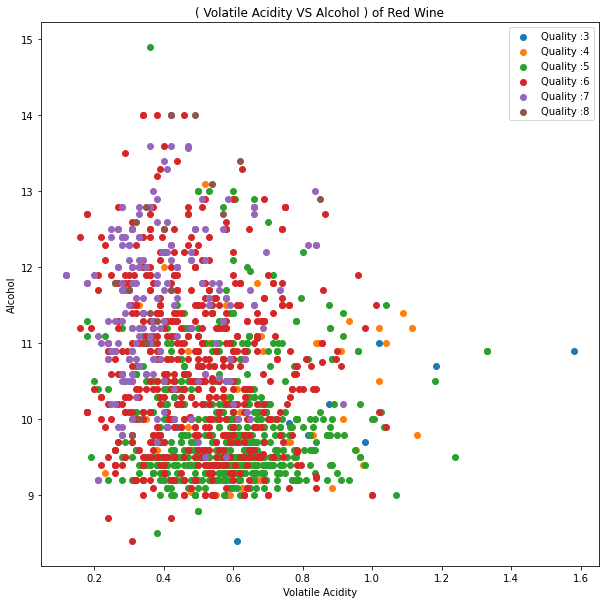

In [113]:
fig = plt.figure(figsize = (10,10))
for i, group in table.groupby('quality'):
    plt.scatter(group['volatile acidity'], group['alcohol'], cmap = group.quality, label = 'Quality :{}'.format(i))
    
plt.xlabel('Volatile Acidity')
plt.ylabel('Alcohol')
plt.title('( Volatile Acidity VS Alcohol ) of Red Wine')
plt.legend()
plt.show()

In [115]:
from sklearn.model_selection import train_test_split

In [184]:
one_hot_data = pd.concat([table, pd.get_dummies(table['quality'], prefix='quality')], axis=1)
one_hot_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0,1,0,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,0,1,0,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,0,1,0,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,0,0,1,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0,1,0,0,0


In [185]:
one_hot_data = one_hot_data.drop('quality', axis = 1)
one_hot_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0,1,0,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0,1,0,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0,1,0,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,0,0,1,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0,1,0,0,0


In [193]:
X = one_hot_data.iloc[:,0:11]
Y = one_hot_data.iloc[:,11:17]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [194]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)
y_train.head()

,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8
548,0,0,0,1,0,0
355,0,0,0,1,0,0
1296,0,0,1,0,0,0
209,0,0,0,0,1,0
140,0,0,1,0,0,0


In [196]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [272]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import keras.optimizers as optim
import tensorflow as tf

In [337]:
model = Sequential()
model.add(Dense(12, input_dim = 11))
model.add(Activation('sigmoid'))
model.add(Dense(8))
model.add(Activation('sigmoid'))
model.add(Dense(6))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 12)                144       
_________________________________________________________________
activation_93 (Activation)   (None, 12)                0         
_________________________________________________________________
dense_100 (Dense)            (None, 8)                 104       
_________________________________________________________________
activation_94 (Activation)   (None, 8)                 0         
_________________________________________________________________
dense_101 (Dense)            (None, 6)                 54        
_________________________________________________________________
activation_95 (Activation)   (None, 6)                 0         
Total params: 302
Trainable params: 302
Non-trainable params: 0
_______________________________________________________

In [338]:
opt = optim.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [339]:
model.fit(x_train, y_train, epochs = 20, batch_size = 1, validation_data=(x_test, y_test), verbose = 2)

Epoch 1/20
1071/1071 - 1s - loss: 1.0716 - accuracy: 0.5462 - val_loss: 1.0112 - val_accuracy: 0.5625
Epoch 2/20
1071/1071 - 2s - loss: 0.9808 - accuracy: 0.5780 - val_loss: 1.0488 - val_accuracy: 0.5322
Epoch 3/20
1071/1071 - 1s - loss: 0.9646 - accuracy: 0.5994 - val_loss: 0.9747 - val_accuracy: 0.5625
Epoch 4/20
1071/1071 - 1s - loss: 0.9511 - accuracy: 0.6125 - val_loss: 0.9641 - val_accuracy: 0.5833
Epoch 5/20
1071/1071 - 1s - loss: 0.9397 - accuracy: 0.6116 - val_loss: 0.9611 - val_accuracy: 0.5814
Epoch 6/20
1071/1071 - 1s - loss: 0.9275 - accuracy: 0.6181 - val_loss: 0.9934 - val_accuracy: 0.5322
Epoch 7/20
1071/1071 - 1s - loss: 0.9285 - accuracy: 0.6181 - val_loss: 0.9626 - val_accuracy: 0.5758
Epoch 8/20
1071/1071 - 1s - loss: 0.9134 - accuracy: 0.6284 - val_loss: 0.9734 - val_accuracy: 0.5814
Epoch 9/20
1071/1071 - 1s - loss: 0.9143 - accuracy: 0.6293 - val_loss: 0.9900 - val_accuracy: 0.5739
Epoch 10/20
1071/1071 - 1s - loss: 0.9107 - accuracy: 0.6349 - val_loss: 0.9764 - 

In [341]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(x_test, y_test)
print("\n Testing Accuracy:", score[1])

34/34 [==============================] - 0s 1ms/step - loss: 0.8172 - accuracy: 0.6872

 Training Accuracy: 0.6872082352638245
17/17 [==============================] - 0s 1ms/step - loss: 0.9743 - accuracy: 0.5909

 Testing Accuracy: 0.5909090638160706
